1. Data Collection and Preprocessing
Data Sources: Gather historical sales data, order data, product data, and customer behavior data from Shopee Singapore's datasets. Relevant features may include order volumes, product categories, timestamps, stock levels, customer demographics, and historical prices.
Data Cleaning: Address any missing values, duplicates, and inconsistencies in the data to ensure a robust foundation for modeling.
Feature Engineering: Create new features such as seasonality indicators, promotional activity markers, and product popularity scores based on sales frequency and revenue generated.

2. Demand Forecasting Models
Time Series Forecasting: Apply models like ARIMA, Prophet, or LSTM (if using deep learning) to predict future sales demand for each product category. Incorporate seasonality (e.g., holiday spikes) and trends in your models to increase accuracy.
Machine Learning Regression Models: Use regression models (e.g., Random Forest Regressor, XGBoost) with features such as historical sales, price changes, promotions, and external factors (e.g., macroeconomic indicators, competitor prices) to forecast demand.
Evaluation: Assess the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Square Error (RMSE). Fine-tune the models through cross-validation and hyperparameter optimization.

3. Inventory Optimization Techniques
Economic Order Quantity (EOQ): Calculate EOQ for products to determine the optimal order quantity that minimizes both holding and ordering costs.
Safety Stock Analysis: Calculate safety stock levels using demand variability and lead time statistics to ensure product availability even during demand spikes or supplier delays.
Reorder Point Calculation: Use the formula:
Reorder Point
=
Lead Time Demand
+
Safety Stock
Reorder Point=Lead Time Demand+Safety Stock
where lead time demand is the average sales volume multiplied by lead time.
ABC Analysis: Classify products based on sales volume and value (A for high value, B for moderate, C for low value). Apply different inventory management strategies for each category (e.g., high safety stock for A, lower for C).

4. Optimization Algorithms for Inventory Levels
Linear Programming: Formulate a linear programming problem that minimizes the total cost (holding, ordering, and shortage costs) while meeting demand constraints. Python libraries like SciPy or PuLP can be used for this.
Reinforcement Learning: Implement reinforcement learning models (e.g., Q-Learning) to optimize reorder policies dynamically, especially for fast-moving products. These models learn from data and continuously improve as new sales data comes in.

5. Performance Monitoring and Adjustment
Dashboard Implementation: Develop dashboards using tools like Tableau or Power BI to monitor key metrics (e.g., stock levels, stockout rates, inventory turnover ratio) and adjust strategies in real-time.
Scenario Analysis: Simulate different scenarios (e.g., sudden demand surges, supplier delays) using Monte Carlo simulations to ensure robustness and responsiveness in your inventory system.

6. Leveraging Data-Driven Insights
Product Segmentation: Identify slow-moving, high-demand, and high-margin products to create tailored inventory strategies.
Price Sensitivity Analysis: Analyze the relationship between pricing and demand to optimize prices that reduce excess stock while boosting sales.
Customer Behavior Analysis: Use customer data to understand buying patterns and personalize inventory levels based on high-value customer preferences and product loyalty scores.

In [13]:
import sys
# !{sys.executable} -m pip install --upgrade numpy pandas matplotlib scikit-learn

In [14]:
import numpy as np

In [15]:
import pandas as pd

In [16]:
orders_df = pd.read_csv('orders.csv', index_col=0)
products_df = pd.read_csv('products_cleaned.csv', index_col=0)
customers_df = pd.read_csv('SG_customers.csv', index_col=0)


,order_time,product_id,customer_id
order_id,,,
1,2019-12-21 08:42:00,18684,299
2,2019-11-25 21:12:00,931,299
3,2019-10-11 22:52:00,385,299
4,2019-10-04 07:19:00,3840,299
5,2019-10-06 15:52:00,5966,299
...,...,...,...
77698,2019-04-21 07:36:00,1391,127441
77699,2019-02-10 14:34:00,12667,127441
77700,2019-06-15 22:51:00,8274,127441



Sub-Category: Occupational Attire
Missing Values:
 product_id                        0
customer_id                       0
item_category_detail              0
title                             0
item_rating                       0
seller_name                       0
price_actual                      0
total_rating                      0
total_sold                        0
favorite                          0
desc                              0
Stock                             0
Ships_From                        0
main_category                     0
mid_category                      0
sub_category                      0
subject_line_length               0
last_open_day                     0
last_login_day                    0
last_checkout_day                 0
open_count_last_10_days           0
open_count_last_30_days           0
open_count_last_60_days           0
login_count_last_10_days          0
login_count_last_30_days          0
login_count_last_60_days          0
checkout_cou

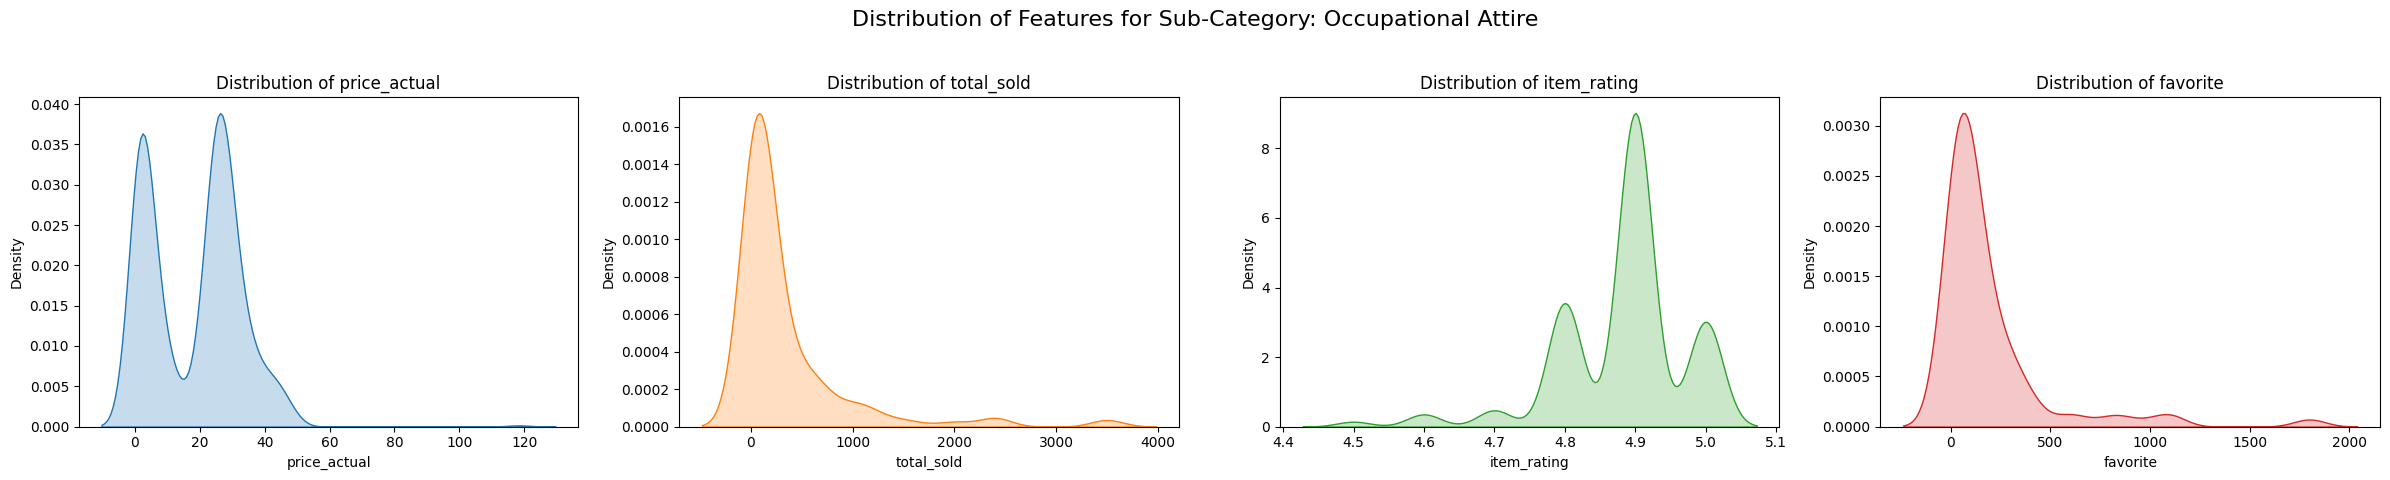

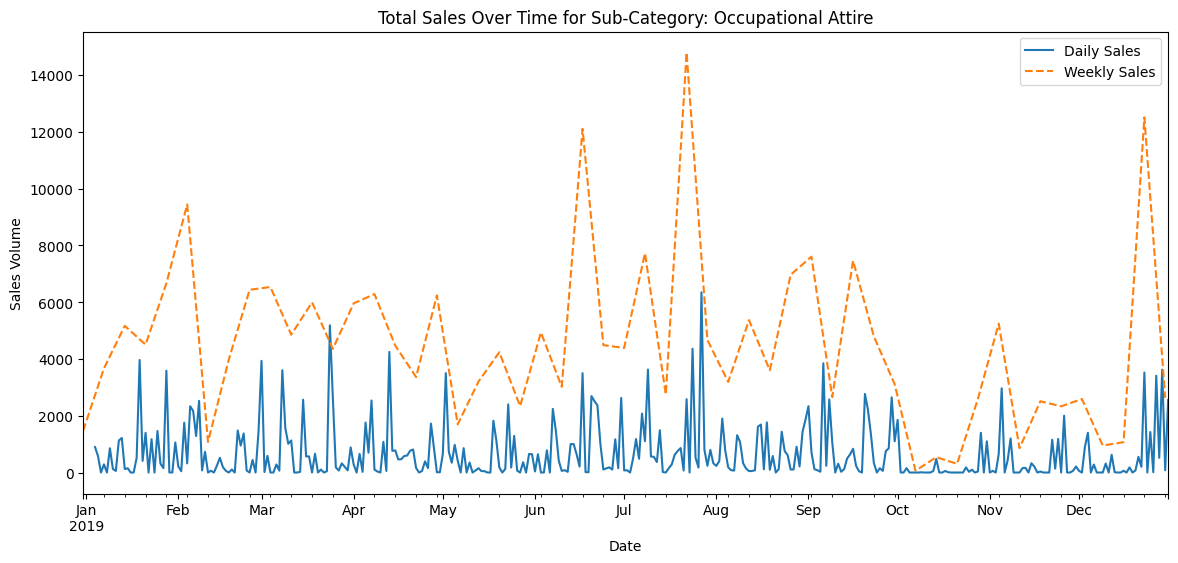

ValueError: Could not interpret value `day_of_week` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features_to_plot = ['price_actual', 'total_sold', 'item_rating', 'favorite']

# Load the data
orders_df = pd.read_csv('orders.csv', index_col=0)
products_df = pd.read_csv('products_cleaned.csv', index_col=0)
customers_df = pd.read_csv('SG_customers.csv', index_col=0)

# Merge the dataframes
orders_products_df = pd.merge(orders_df, products_df, on='product_id', how='left')
merged_df = pd.merge(orders_products_df, customers_df, on='customer_id', how='left')
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], errors='coerce')
merged_df.dropna(subset=['order_time'], inplace=True)
numeric_columns = ['price_actual', 'item_rating', 'favorite', 'total_sold']
for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
merged_df.dropna(subset=numeric_columns, inplace=True)
merged_df.set_index('order_time', inplace=True)

# Define top categories
top_cats = merged_df.sub_category.value_counts().iloc[2:].head(3).index

# Loop through each top sub-category and create individual plots
for sub_category in top_cats:
    # Filter data for the current sub-category
    category_df = merged_df[merged_df['sub_category'] == sub_category]
    
    # Display Missing Values and Descriptive Statistics
    print(f"\nSub-Category: {sub_category}")
    print("Missing Values:\n", category_df.isnull().sum())
    print("\nDescriptive Statistics:\n", category_df[features_to_plot].describe())
    print("-" * 50)

    # Set up the figure with 4 subplots for KDE plots of each feature
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))
    fig.suptitle(f'Distribution of Features for Sub-Category: {sub_category}', fontsize=16)
    
    for i, feature in enumerate(features_to_plot):
        sns.kdeplot(data=category_df, x=feature, fill=True, ax=axes[i], color=f'C{i}')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Plot total sales over time (daily and weekly)
    plt.figure(figsize=(14, 6))
    category_df['total_sold'].resample('D').sum().plot(label='Daily Sales')
    category_df['total_sold'].resample('W').sum().plot(label='Weekly Sales', linestyle='--')
    plt.legend()
    plt.title(f"Total Sales Over Time for Sub-Category: {sub_category}")
    plt.xlabel("Date")
    plt.ylabel("Sales Volume")
    plt.show()

    # Violin plot of sales volume by day of the week
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='day_of_week', y='total_sold', data=category_df.reset_index(), inner='quartile', palette='Blues')
    plt.title(f"Sales Volume by Day of the Week for Sub-Category: {sub_category}")
    plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
    plt.ylabel("Sales Volume")
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

    # Violin plot of sales volume by month
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='month', y='total_sold', data=category_df.reset_index(), inner='quartile', palette='Greens')
    plt.title(f"Sales Volume by Month for Sub-Category: {sub_category}")
    plt.xlabel("Month")
    plt.ylabel("Sales Volume")
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()


In [25]:
# Merge orders and products DataFrames on 'product_id'
orders_products_df = pd.merge(orders_df, products_df, on='product_id', how='left')

# Merge the combined orders and products DataFrame with the customers DataFrame on 'customer_id'
merged_df = pd.merge(orders_products_df, customers_df, on='customer_id', how='left')

# Convert 'order_time' to datetime format for time series analysis
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], errors='coerce')

# Drop rows with NaT in 'order_time'
merged_df.dropna(subset=['order_time'], inplace=True)

# Convert columns to numeric, handling any non-numeric values gracefully
numeric_columns = ['price_actual', 'item_rating', 'favorite', 'total_sold']
for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Drop rows where necessary columns contain NaN values
merged_df.dropna(subset=numeric_columns, inplace=True)

# Set 'order_time' as the index
merged_df.set_index('order_time', inplace=True)

# Feature Engineering
merged_df['day_of_week'] = merged_df.index.dayofweek
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
merged_df['day_of_year'] = merged_df.index.dayofyear
merged_df['month'] = merged_df.index.month

# Fourier Transform Features for Seasonality
def create_fourier_features(df, max_freq, periods):
    t = np.arange(len(df))
    for i in range(1, max_freq + 1):
        df[f'sin_{i}'] = np.sin(2 * np.pi * i * t / periods)
        df[f'cos_{i}'] = np.cos(2 * np.pi * i * t / periods)
    return df

# Apply Fourier features for weekly and yearly seasonality
merged_df = create_fourier_features(merged_df, max_freq=3, periods=7)  # Weekly seasonality
merged_df = create_fourier_features(merged_df, max_freq=3, periods=365)  # Yearly seasonality

# Identify the top sub-categories to analyze
top_cats = merged_df.sub_category.value_counts().iloc[2:].head(3).index


Top features for Tops:
                        feature  importance
3                  total_rating    0.115087
12      open_count_last_60_days    0.088937
5                    total_sold    0.083618
11      open_count_last_30_days    0.080121
10      open_count_last_10_days    0.078333
0                  price_actual    0.073139
23                        cos_2    0.051578
17  checkout_count_last_30_days    0.043769
6                   day_of_week    0.042561
22                        cos_1    0.041955
Random Forest with Top Features Performance Metrics:
MSE: 0.45
RMSE: 0.67
MAE: 0.54
R^2: 0.21
--------------------------------------------------


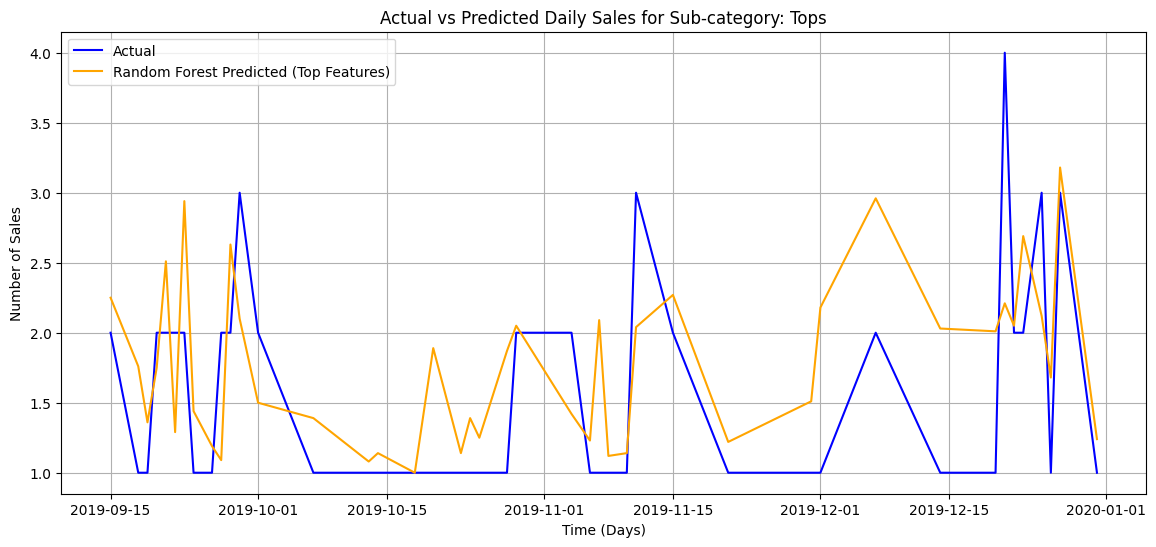

Top features for Sets:
                        feature  importance
4                         Stock    0.132317
24                        cos_3    0.116971
3                  total_rating    0.080692
5                    total_sold    0.080591
17  checkout_count_last_30_days    0.056174
2                      favorite    0.052105
22                        cos_1    0.052072
0                  price_actual    0.049183
18  checkout_count_last_60_days    0.046755
23                        cos_2    0.041283
Random Forest with Top Features Performance Metrics:
MSE: 0.35
RMSE: 0.59
MAE: 0.38
R^2: -0.09
--------------------------------------------------


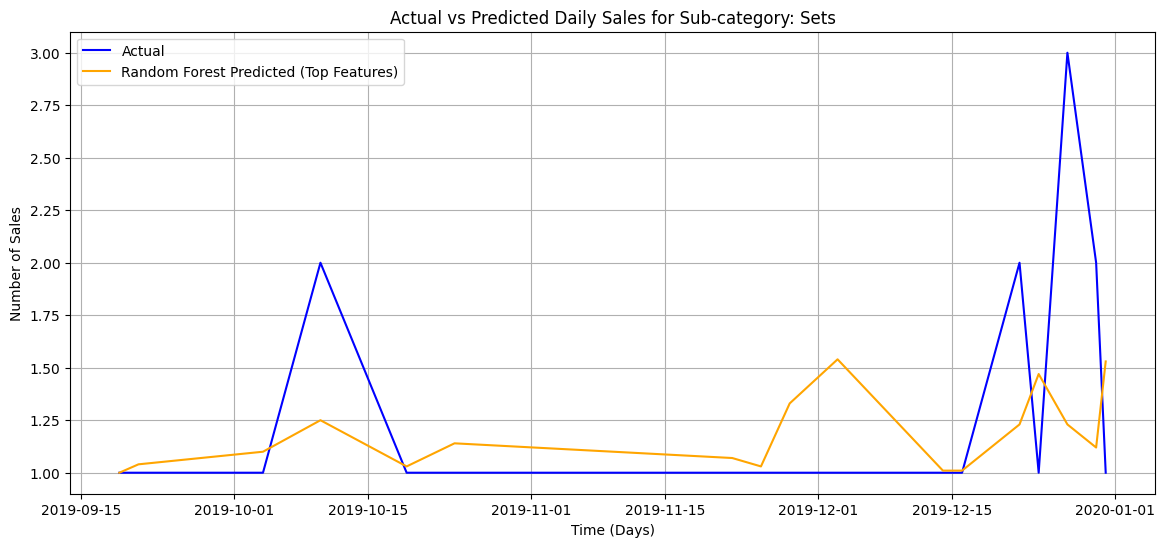

No valid data for sub-category 'Outerwear' to analyze.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Loop through each top sub-category and create individual plots
for sub_category in top_cats:
    sub_category_df = merged_df[merged_df['sub_category'] == sub_category]

    if sub_category_df.empty:
        print(f"No valid data for sub-category '{sub_category}' to analyze.")
        continue

    # Resampling and feature engineering for daily aggregation
    grouped_df = sub_category_df.resample('D').agg({
        'price_actual': 'mean',
        'item_rating': 'mean',
        'favorite': 'mean',
        'total_rating': 'mean',
        'Stock': 'last',
        'total_sold': 'last',
        'day_of_week': 'first',
        'is_weekend': 'first',
        'day_of_year': 'first',
        'month': 'first',
        'open_count_last_10_days': 'mean',
        'open_count_last_30_days': 'mean',
        'open_count_last_60_days': 'mean',
        'login_count_last_10_days': 'mean',
        'login_count_last_30_days': 'mean',
        'login_count_last_60_days': 'mean',
        'checkout_count_last_10_days': 'mean',
        'checkout_count_last_30_days': 'mean',
        'checkout_count_last_60_days': 'mean',
        **{f'sin_{i}': 'first' for i in range(1, 4)},
        **{f'cos_{i}': 'first' for i in range(1, 4)}
    }).reset_index()

    daily_sales = sub_category_df.resample('D').size()
    grouped_df['daily_sales'] = daily_sales.values
    grouped_df.dropna(inplace=True)

    if grouped_df.empty:
        print(f"No valid data for sub-category '{sub_category}' after resampling.")
        continue

    # Define features and target
    features = grouped_df.drop(['order_time', 'daily_sales'], axis=1)
    X = features.values
    y = grouped_df['daily_sales'].values

    # Train-test split
    split_point = int(len(X) * 0.8)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    # Model setup with default hyperparameters
    rf_model = RandomForestRegressor(random_state=0)
    rf_model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = rf_model.feature_importances_
    feature_names = features.columns
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    importance_df = importance_df.sort_values(by='importance', ascending=False)

    # Display top features
    print(f"Top features for {sub_category}:")
    print(importance_df.head(10))

    # Select top N important features (e.g., top 10 features)
    top_features = importance_df['feature'].head(10).values
    X_train_top = X_train[:, [list(feature_names).index(f) for f in top_features]]
    X_test_top = X_test[:, [list(feature_names).index(f) for f in top_features]]

    # Retrain model with top features only
    rf_model.fit(X_train_top, y_train)
    y_pred_rf = rf_model.predict(X_test_top)

    # Calculate and print evaluation metrics
    def print_metrics(y_true, y_pred, model_name):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"{model_name} Performance Metrics:")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R^2: {r2:.2f}")
        print('-' * 50)

    print_metrics(y_test, y_pred_rf, "Random Forest with Top Features")

    # Plot actual vs. predicted for the model using top features
    plt.figure(figsize=(14, 6))
    plt.plot(grouped_df['order_time'].iloc[split_point:], y_test, label='Actual', color='blue')
    plt.plot(grouped_df['order_time'].iloc[split_point:], y_pred_rf, label='Random Forest Predicted (Top Features)', color='orange')
    plt.title(f'Actual vs Predicted Daily Sales for Sub-category: {sub_category}')
    plt.xlabel('Time (Days)')
    plt.ylabel('Number of Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'merged_df' and 'top_cats' are already defined and contain the relevant data

# Extract the sub_category name from top_cats
sub_category_name = list(top_cats.index)[1]
                                         
# Filter the DataFrame based on the specified sub_category
filtered_prices = merged_df[merged_df.sub_category == sub_category_name].price_actual

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices, bins=30, edgecolor='black')
plt.xlabel('Price Actual')
plt.ylabel('Frequency')
plt.title(f'Histogram of Price Actual for Sub-category: {sub_category_name}')
plt.show()


AttributeError: 'Index' object has no attribute 'index'

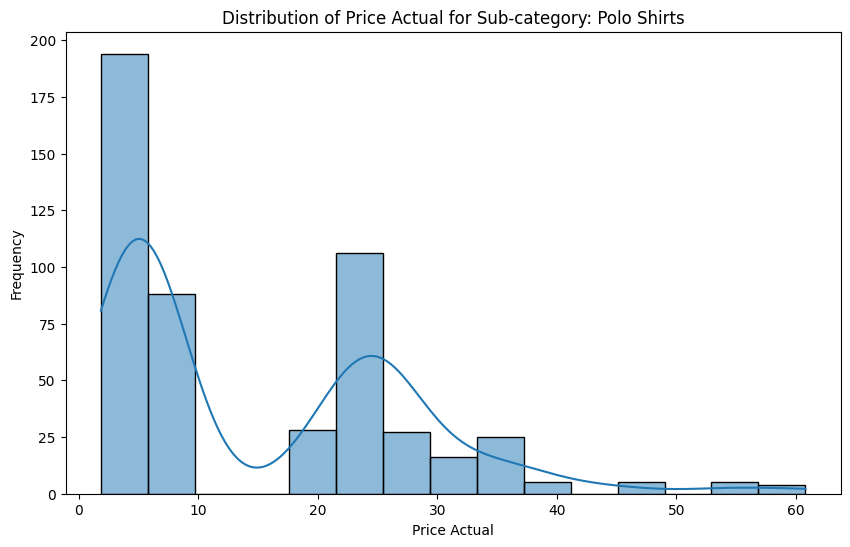

In [38]:
import seaborn as sns
import pandas as pd


# Extract the sub_category name from top_cats
sub_category_name = list(top_cats.index)[2]

# Filter the DataFrame based on the specified sub_category
filtered_prices = merged_df[merged_df.sub_category == sub_category_name].price_actual

# Plotting the distribution with a KDE plot to check for normality
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=15, kde=True, edgecolor='black')
plt.xlabel('Price Actual')
plt.ylabel('Frequency')
plt.title(f'Distribution of Price Actual for Sub-category: {sub_category_name}')
plt.show()

In [20]:
merged_df[merged_df.sub_category == list(top_cats.index)[1]].price_actual.value_counts()

price_actual
24.881819    48
3.051838     35
27.715668    35
3.082979     24
2.491296     23
             ..
6.203327      1
1.541489      1
5.913714      1
30.269247     1
3.332108      1
Name: count, Length: 79, dtype: int64

In [18]:
list(top_cats.index)[1]

'Business & Casual Shirts'

In [2]:
merged_df.sub_category.value_counts()

sub_category
Others                                     11774
Android Tablets                              688
Occupational Attire                          625
Business & Casual Shirts                     583
Polo Shirts                                  503
                                           ...  
Chargers & Power Supply                        1
Yogurt Drinks                                  1
Bread Makers & Electric Sandwich Makers        1
Pads & Covers                                  1
Local Attractions                              1
Name: count, Length: 896, dtype: int64

In [12]:
list(top_cats.index)

['Occupational Attire',
 'Business & Casual Shirts',
 'Polo Shirts',
 'Body Sunscreen & After Sun',
 'T-Shirts',
 'Casual Set',
 'Monopod',
 'Backpack',
 'Powerbanks',
 'Shirts & Blouses']

In [13]:
merged_df[merged_df.sub_category.isin(list(top_cats.index))]

,order_id,product_id,customer_id,price,price_ori,item_category_detail,title,item_rating,seller_name,price_actual,...,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,checkout_count_last_1_year,day_of_week,is_weekend
order_time,,,,,,,,,,,,,,,,,,,,,
2019-07-01 16:19:29.625384,order_12,14509,299,10.214314,21.798840,Shopee | Men Clothes | Sets | Casual Set,Summer New Men's Short-sleeved Solid Color Col...,4.9,luckyshops.my,10.214314,...,0,2393,1.0,1.0,1.0,38.0,@gmail.com,27,0,0
2019-03-04 23:18:40.493116,order_14,15023,299,7.782186,11.117409,Shopee | Women's Bags | Backpacks | Backpack,Beg galas lelaki beg galas perjalanan berkapas...,4.7,qixianshangmao.my,7.782186,...,0,2393,1.0,1.0,1.0,38.0,@gmail.com,27,0,0
2019-04-19 16:45:36.559416,order_27,5321,299,7.626480,16.237022,Shopee | Men Clothes | Tops | Polo Shirts,🔥Malaysia spot🔥COD OOTD 5 color Men's Baju Pol...,4.8,lulunsigarment.my,7.626480,...,0,2393,1.0,1.0,1.0,38.0,@gmail.com,27,4,0
2019-12-15 18:01:48.036201,order_47,8413,2306,35.033850,35.033850,Shopee | Men Clothes | Sets | Casual Set,Mandarin - FIRST LINE Scrubs LS Long Sleeve Th...,5.0,theatrebluesinternational8q.my,35.033850,...,0,2434,1.0,1.0,4.0,56.0,@gmail.com,196,6,1
2019-12-16 19:31:03.262979,order_51,5271,2306,2.771567,3.269826,Shopee | Men's Bags & Wallets | Men's Backpack...,【MY】Luminous Anime School Backpack Beg Sekolah...,4.8,mabl.my,2.771567,...,0,2434,1.0,1.0,4.0,56.0,@gmail.com,196,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-10 11:17:58.589634,order_65859,8818,124007,0.311412,0.311412,Shopee | Women Clothes | Tops | Shirts & Blouses,link for payment(live streaming only) | Shopee...,5.0,zilahadib,0.311412,...,0,69587,1.0,1.0,3.0,24.0,other,13,2,0
2019-04-14 19:09:11.049107,order_65861,19315,126433,1.616228,11.833656,Shopee | Men Clothes | Shirts | Business & Cas...,【Local Delivery】Kemeja Petak Lelaki Men's Hand...,4.7,maisidamall.my,1.616228,...,0,69590,NaN,1.0,0.0,45.0,@qq.com,7,6,1
2019-06-08 10:59:39.284878,order_65873,7783,126576,1.553946,1.553946,Shopee | Men Clothes | T-shirts & Singlets | T...,💎2023 Medium T-shirt New Fasion Design T-shirt...,4.4,fashion_shop_for_u,1.553946,...,0,69594,NaN,1.0,0.0,45.0,@yahoo.com,9,5,1
